多層のdeepencoderでより少ない要素数で４と９を分離できるだろうか？

In [25]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [26]:
import numpy as np

In [27]:
batch_size = 128
epochs = 300

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [28]:
keep_train_idx = np.logical_or(y_train == 4, y_train == 9)
keep_test_idx = np.logical_or(y_test ==4, y_test == 9)

x_train = x_train[keep_train_idx]
x_test = x_test[keep_test_idx]

In [29]:
x_train_vec = x_train.reshape(x_train.shape[0], 784)
x_test_vec = x_test.reshape(x_test.shape[0], 784)

中央の要素数は4個に設定する。

In [30]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(784, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 404       
_________________________________________________________________
dropout_11 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               500       
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 784)               79184     
Total para

In [31]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_vec, x_train_vec,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_vec, x_test_vec))
score = model.evaluate(x_test_vec, x_test_vec, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 11791 samples, validate on 1991 samples
Epoch 1/300
11791/11791 [==============================] - 1s - loss: 0.0772 - acc: 0.0071 - val_loss: 0.0526 - val_acc: 0.0095
Epoch 2/300
11791/11791 [==============================] - 1s - loss: 0.0531 - acc: 0.0080 - val_loss: 0.0517 - val_acc: 0.0095
Epoch 3/300
11791/11791 [==============================] - 1s - loss: 0.0523 - acc: 0.0087 - val_loss: 0.0509 - val_acc: 0.0095
Epoch 4/300
11791/11791 [==============================] - 1s - loss: 0.0510 - acc: 0.0083 - val_loss: 0.0493 - val_acc: 0.0095
Epoch 5/300
11791/11791 [==============================] - 1s - loss: 0.0495 - acc: 0.0090 - val_loss: 0.0477 - val_acc: 0.0080
Epoch 6/300
11791/11791 [==============================] - 1s - loss: 0.0485 - acc: 0.0104 - val_loss: 0.0465 - val_acc: 0.0090
Epoch 7/300
11791/11791 [==============================] - 1s - loss: 0.0479 - acc: 0.0091 - val_loss: 0.0461 - val_acc: 0.0100
Epoch 8/300
11791/11791 [==============================

11791/11791 [==============================] - 1s - loss: 0.0425 - acc: 0.0109 - val_loss: 0.0383 - val_acc: 0.0116
Epoch 65/300
11791/11791 [==============================] - 1s - loss: 0.0424 - acc: 0.0107 - val_loss: 0.0382 - val_acc: 0.0116
Epoch 66/300
11791/11791 [==============================] - 1s - loss: 0.0424 - acc: 0.0093 - val_loss: 0.0383 - val_acc: 0.0131
Epoch 67/300
11791/11791 [==============================] - 1s - loss: 0.0423 - acc: 0.0100 - val_loss: 0.0381 - val_acc: 0.0121
Epoch 68/300
11791/11791 [==============================] - 1s - loss: 0.0423 - acc: 0.0108 - val_loss: 0.0380 - val_acc: 0.0141
Epoch 69/300
11791/11791 [==============================] - 1s - loss: 0.0424 - acc: 0.0098 - val_loss: 0.0381 - val_acc: 0.0116
Epoch 70/300
11791/11791 [==============================] - 1s - loss: 0.0425 - acc: 0.0107 - val_loss: 0.0381 - val_acc: 0.0136
Epoch 71/300
11791/11791 [==============================] - 1s - loss: 0.0424 - acc: 0.0097 - val_loss: 0.0380

11791/11791 [==============================] - 0s - loss: 0.0413 - acc: 0.0106 - val_loss: 0.0369 - val_acc: 0.0100
Epoch 128/300
11791/11791 [==============================] - 1s - loss: 0.0415 - acc: 0.0095 - val_loss: 0.0370 - val_acc: 0.0110
Epoch 129/300
11791/11791 [==============================] - 0s - loss: 0.0415 - acc: 0.0103 - val_loss: 0.0371 - val_acc: 0.0110
Epoch 130/300
11791/11791 [==============================] - 1s - loss: 0.0414 - acc: 0.0112 - val_loss: 0.0370 - val_acc: 0.0121
Epoch 131/300
11791/11791 [==============================] - 1s - loss: 0.0414 - acc: 0.0109 - val_loss: 0.0370 - val_acc: 0.0110
Epoch 132/300
11791/11791 [==============================] - 0s - loss: 0.0415 - acc: 0.0100 - val_loss: 0.0370 - val_acc: 0.0095
Epoch 133/300
11791/11791 [==============================] - 1s - loss: 0.0415 - acc: 0.0105 - val_loss: 0.0370 - val_acc: 0.0110
Epoch 134/300
11791/11791 [==============================] - 0s - loss: 0.0414 - acc: 0.0096 - val_loss:

11791/11791 [==============================] - 0s - loss: 0.0407 - acc: 0.0109 - val_loss: 0.0363 - val_acc: 0.0126
Epoch 191/300
11791/11791 [==============================] - 1s - loss: 0.0406 - acc: 0.0107 - val_loss: 0.0363 - val_acc: 0.0085
Epoch 192/300
11791/11791 [==============================] - 1s - loss: 0.0406 - acc: 0.0090 - val_loss: 0.0362 - val_acc: 0.0110
Epoch 193/300
11791/11791 [==============================] - 1s - loss: 0.0406 - acc: 0.0104 - val_loss: 0.0363 - val_acc: 0.0090
Epoch 194/300
11791/11791 [==============================] - 1s - loss: 0.0406 - acc: 0.0091 - val_loss: 0.0363 - val_acc: 0.0100
Epoch 195/300
11791/11791 [==============================] - 1s - loss: 0.0405 - acc: 0.0113 - val_loss: 0.0362 - val_acc: 0.0116
Epoch 196/300
11791/11791 [==============================] - 0s - loss: 0.0406 - acc: 0.0115 - val_loss: 0.0363 - val_acc: 0.0100
Epoch 197/300
11791/11791 [==============================] - 1s - loss: 0.0406 - acc: 0.0119 - val_loss:

11791/11791 [==============================] - 1s - loss: 0.0404 - acc: 0.0094 - val_loss: 0.0363 - val_acc: 0.0105
Epoch 253/300
11791/11791 [==============================] - 1s - loss: 0.0402 - acc: 0.0102 - val_loss: 0.0364 - val_acc: 0.0090
Epoch 254/300
11791/11791 [==============================] - 1s - loss: 0.0403 - acc: 0.0095 - val_loss: 0.0363 - val_acc: 0.0060
Epoch 255/300
11791/11791 [==============================] - 1s - loss: 0.0402 - acc: 0.0087 - val_loss: 0.0363 - val_acc: 0.0090
Epoch 256/300
11791/11791 [==============================] - 1s - loss: 0.0402 - acc: 0.0103 - val_loss: 0.0363 - val_acc: 0.0085
Epoch 257/300
11791/11791 [==============================] - 1s - loss: 0.0401 - acc: 0.0109 - val_loss: 0.0363 - val_acc: 0.0075
Epoch 258/300
11791/11791 [==============================] - 1s - loss: 0.0403 - acc: 0.0097 - val_loss: 0.0362 - val_acc: 0.0085
Epoch 259/300
11791/11791 [==============================] - 1s - loss: 0.0401 - acc: 0.0105 - val_loss:

エポック数は先ほどより長くしたこともあり少々待ち時間がかかる。

## Testing results 

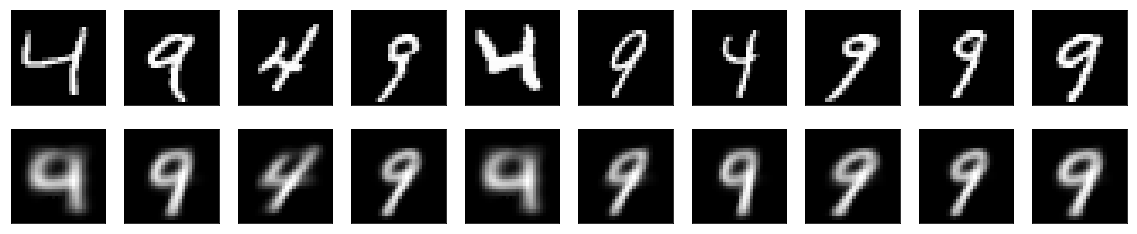

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    predicted = model.predict(x_train_vec[i:i+1]).reshape((28,28))
    plt.imshow(predicted)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

４については９になってしまっているものもある。<br>要素数の最適化のかわりに、スパース正則化というテクニックがある。これはkerasのregularizerを指定するだけでできる。これはPCAと同じなのだが、線形な分離しかできない。最近の流行は<a href="http://cs.stanford.edu/people/karpathy/tsnejs/">tSNEアルゴリズム</a>である。